<a href="https://colab.research.google.com/github/REDRAMI/Projet-NLP-FSR-UM5/blob/master/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###              **Projets Fin de modèle Machine Learning for Natural Language Processing / FSR université M5 RABAT.**




---



Mon projet consiste a utiliser le NLP pour entrainer un modèle qui me permettra par la suite de classifier les avis des clients "Commentaires" en positive ou négative.

Mon Module aura comme inpute une base de donnée (fichier CSV) qui contient un ensembles d'avis des clients d'un restaurant accompagné par une notation binaire donnée par le client juste aprés avoir écrit son commentaire. 0 => Avis positif, 1 => Avis négatif.

 Sur ce projet je travaillerai avec **python** comme luangage de programation, Extension  **numpy**, j'utiliserai la fameuse bibliothéque **sklearn**, **nltk** (Natural Language Tool Kit), et pour  l'analyse des données la bibleothéque **pandas** sera mon accompagnée.

Importez les bibliothéques à utiliser en plus de l'ensemble de données avec le délimiteur de paramètre comme «\ t» car les colonnes sont séparées par un espace de tabulation. Les avis et leur catégorie (0 ou 1) ne sont séparés par aucun autre symbole mais avec un espace de tabulation, car la plupart des autres symboles sont la revue (comme $ pour le prix,….!, Etc.) et l'algorithme peut les utiliser comme délimiteur , ce qui conduira à un comportement étrange en sortie.

In [41]:
# Importation des bibliothéques 
import numpy as np   
import pandas as pd  
import sys
import sklearn
import nltk  
import os


import urllib.request
data_path = os.path.join("datasets", "")
os.makedirs(data_path, exist_ok=True)
download_path = 'https://drive.google.com/uc?export=download&id=1lYjqZYcqatAp-8VmLSomxxypuSS0kpMW'
url = data_path + "AvisDesClients.tsv"
urllib.request.urlretrieve(download_path, url)

# Importation du dataset 

dataset = pd.read_csv(url , delimiter = '\t') 





Ainsi Nos données sont representé comme suit :





In [43]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


 

### 1.   **Nettoyage ou prétraitement du texte:**

*   **Enlever les Punctuations, et les Nombres** : Vu que les ponctuations, les nombres n'aident pas beaucoup dans le traitement du texte donné, s'ils sont inclus, ils augmenteront simplement la taille des Bags of Words que nous créerons par la suite ainsi réduiront l'efficacité de l'algorithme.
*   **Stemming** : Consiste à prendre en considération que les racines des mots.

*   **Convertir chaque mot en minuscule(Lower Case)** : par exemple, c'est inutile d’avoir les mêmes mots dans des différentes formes (par exemple «bad» et «BAD»).








In [45]:


# Importation de la biblio re pour nettoyer la data 
import re  

nltk.download('stopwords') 
  
# pour enlever les stopwords
from nltk.corpus import stopwords 
  
# PorterStemmer pour le stemming 
from nltk.stem.porter import PorterStemmer 
  
# Initialisation d'un tableau vide
# pour en remplir par la suite par du text finalisé 
corpus = []  
  
# 1000 (Avis) les lignes à nettoyer 
for i in range(0, 1000):  
      
    # colonne : "Avis", ligne numero i 
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])  
      
    # convertir tous les cas en minuscules 
    review = review.lower()  
      
    # diviser en tableau (le délimiteur par défaut est " ")
    review = review.split()  
      

    # création d'un objet PorterStemmer 
    # prendre la racine principale de chaque mot
    ps = PorterStemmer()  
      
    
    # boucle pour stemmer chaque mot
    # dans le tableau de strings à la i ème ligne  
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  

    # lier tous les éléments du tableau de chaînes
    # pour recréer  une chaîne de caracteres
    review = ' '.join(review)   
      
    # ajouter chaque chaîne pour créer
    # un tableau de texte propre
    corpus.append(review)  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Ainsi nos données seront représentées comme suit:

In [46]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc



####2.   La **Tokenisation**, et la construction de **Bag of Words**:
 qui consiste à  construire une matrice qui englobe l'nsemble des mots utilisés en colonnes et les milles avis en lignes pour calculer le nombre d'ocurrence de chque mot.




Pour faire, nous avons besoin de la classe ***CountVectorizer*** de **sklearn**.
Nous définirons un nombre maximum de fonctionnalités «max_features».

Utilisation de **fit_transform** : permet d'apprendre le dictionnaire de vocabulaire et renvoie la matrice document-term. Cela équivaut à un ajustement suivi de transformation, mais implémenté plus efficacement. en fin nous convirtissons la matrice en un tableau.

In [50]:

# Creation de Bag of Words modele 
from sklearn.feature_extraction.text import CountVectorizer 
  
# Pour extraire max 1500 feature. 

# "max_features" est un attribut qu'on fixe
# à expérimenter pour pour obtenir de meilleurs résultats
cv = CountVectorizer(max_features = 1500)  
  
# X contient corpus (une variable dependante)
X = cv.fit_transform(corpus).toarray()  
  

Construction de notre vecteur **Y** qui contient les réponses binaires **0** => négative et **1** => positive.

In [51]:
# y c'est le vecteur de reponses qui contient les avis des clients
# ses valeurs sont soit 0 ou 1
y = dataset.iloc[:, 1].values  


### **Diviser le corpus en ensemble d'entraînement et de test:** 

Pour cela, nous avons besoin de la classe **train_test_split** de **sklearn.cross_validation**. Le fractionnement peut être fait **70/30**% ou **80/20**% ou **85/15**% ou **75/25**%, ici nous choisisons **75/25**% via l'attribut **«test_size»**.

X est le sac de mots, y est 0 ou 1 (positif ou négatif).

In [52]:

# Diviser l'ensemble de données en
# l'ensemble d'entraînement et l'ensemble de test
from sklearn.model_selection import train_test_split 
  

# tester avec "test_size"
# pour obtenir de meilleurs résultats

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10) 
X.shape

(1000, 1500)

In [ ]:
y.shape

(1000,)

### **Ajustement des modèles prédictifs**

Pour faire nous allons essayer de tester un ensemble de modèles predictifs, en calculant leurs **«accuracy_score»** pour en fixer le plus precis parmis l'ensemble des modeles.

### **Décision Trees:**

C'est un modèle d'apprentissage machine supervisé non paramétrique utilisée pour la classification et la régression. L'objectif est de créer un modèle qui prédit la valeur d'une variable cible en apprenant des règles de décision simples déduites des caractéristiques des données.



In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

tree_clf = DecisionTreeClassifier(random_state=85)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.72



La fonction **export_graphviz**  de **sklearn.tree** fonction génère une représentation Graphique de l'arbre de décision.

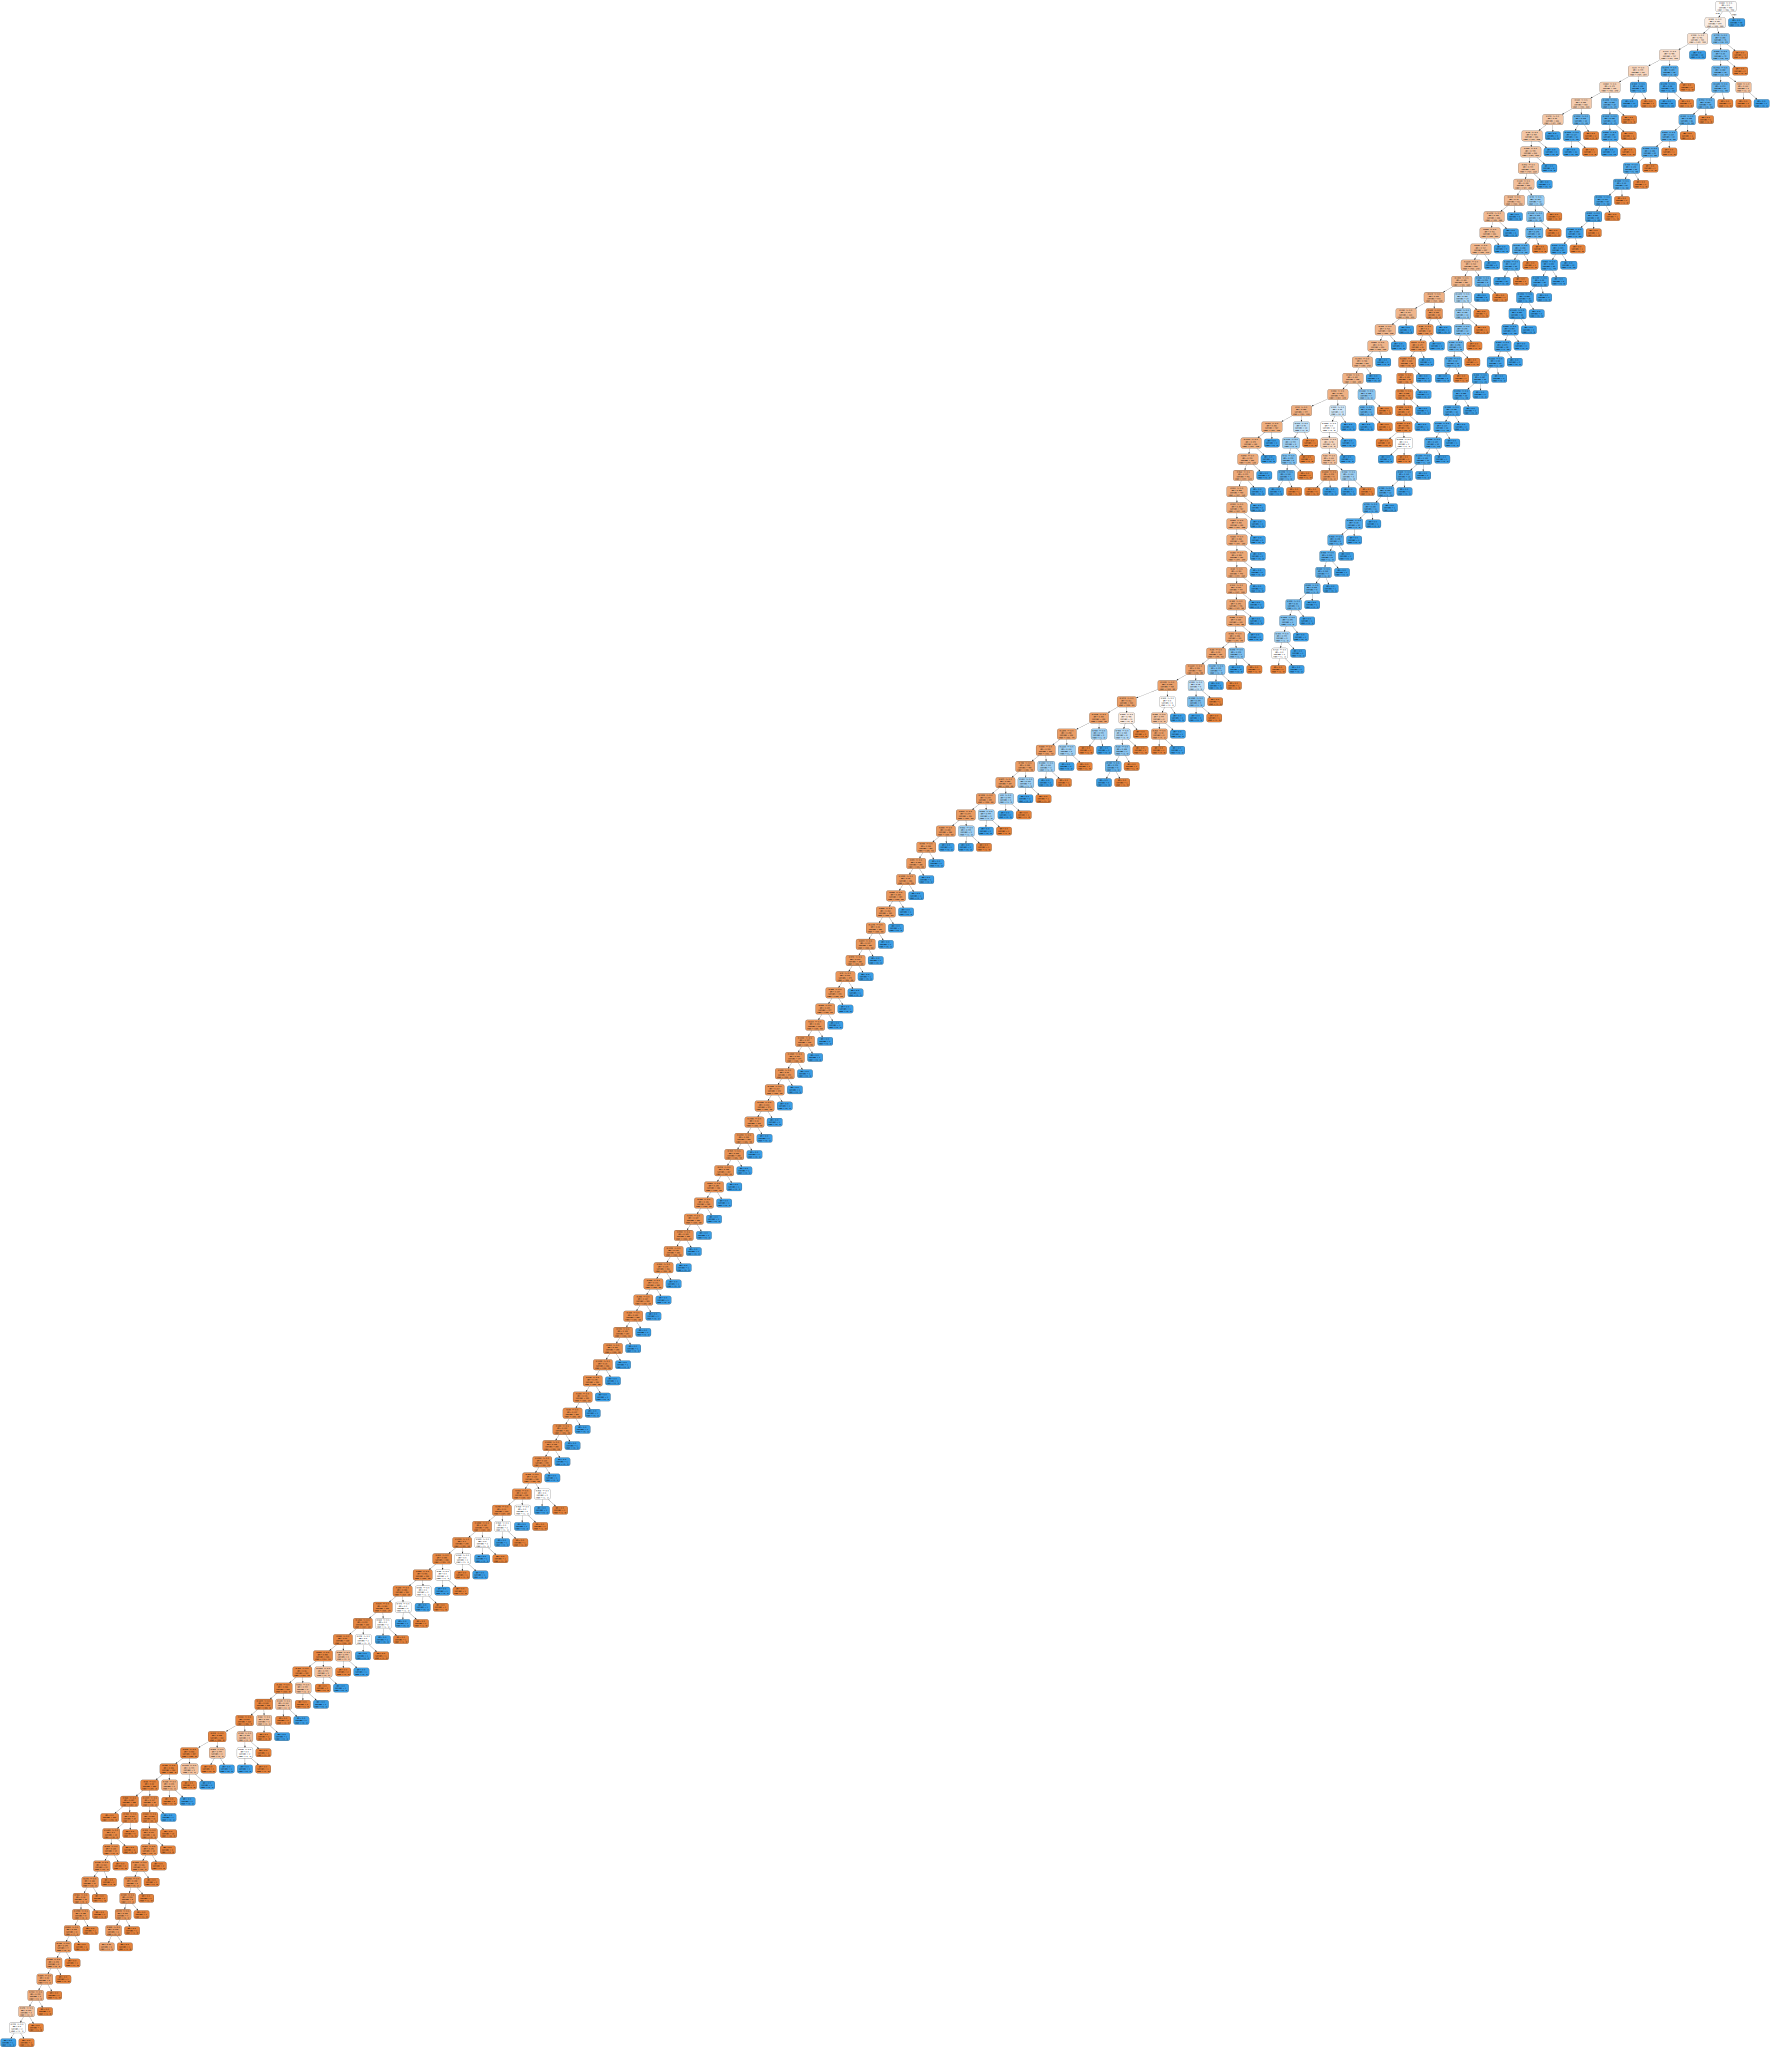

In [55]:
from graphviz import Source
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
        tree_clf,
        out_file=None, 
        
        rounded=True,
        filled=True
    )
graph = Source(dot_data)  
graph

## **Bagging**


Le classificateur Bagging **BaggingClassifier** est un méta-estimateur d'ensemble qui ajuste les classificateurs de base chacun sur des sous-ensembles aléatoires de l'ensemble de données d'origine, puis agrège leurs prédictions individuelles (soit par vote, soit par moyenne) pour former une prédiction finale. Un tel méta-estimateur peut généralement être utilisé comme un moyen de réduire la variance d'un estimateur en boîte noire (par exemple, un arbre de décision), en introduisant la randomisation dans sa procédure de construction, puis en en faisant un ensemble.

In [56]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=50,
    max_samples=50, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred_Bg = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_Bg))

0.63


## **Rondom Forest**


Une **Random forest** est un méta-estimateur qui ajuste un certain nombre de classificateurs d'arbres de décision sur divers sous-échantillons de l'ensemble de données et utilise la moyenne pour améliorer la précision prédictive et contrôler le sur-ajustement. La taille du sous-échantillon est contrôlée avec le paramètre max_samples si bootstrap = True (par défaut), sinon l'ensemble de données est utilisé pour construire chaque arbre.

In [57]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

0.75


## **Voting**

Un **voting** est un méta-estimateur d'ensemble qui ajuste plusieurs régresseurs de base, dans notre cas c'est il s'agit des classifieurs utilisés juste avant chacun sur l'ensemble de données. Ensuite, il fait la moyenne des prédictions individuelles pour former une prédiction finale.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state = 42)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state = 42)
svm_clf = SVC(gamma="scale", probability=True, random_state = 42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

On test le score de chaque classifieur 

In [64]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.74
RandomForestClassifier 0.708
SVC 0.744
VotingClassifier 0.728


les résultats nous montrent que la SVC la plus précise. Donc on se focalise sur le SVC, et on passe à l'étape de la régularisation du classifieur à l'aide de **Cross-Validation**.

## **SVC avec recherche en grille**


Cet exemple montre comment un classifieur est optimisé par validation croisée <<**Cross-Validation**>>, effectuée à l'aide de l'objet **sklearn.model_selection.GridSearchCV**.

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100.]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30.],
         'gamma': [0.01, 0.03, 0.1]}
    ]


svm_clf = SVC()
svm_grid_search = GridSearchCV(svm_clf, param_grid, cv=5, verbose=2)
svm_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   0.9s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   0.9s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.9s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.9s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.8s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.8s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.8s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.8s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10.0, 30.0, 100.0], 'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0],
                          'gamma': [0.01, 0.03, 0.1], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)



*   Le meilleur score du SVM recherche par grille :



In [66]:
svm_grid_search.best_score_

0.7973333333333333



*   Les meilleurs paramètres obtenus pendant la recherche : 



In [67]:
svm_grid_search.best_params_

{'C': 30.0, 'gamma': 0.01, 'kernel': 'rbf'}

##  **SVM avec Kernel RBF**

Utilisation des meilleurs paramètres qu'on a obtenu pendant la recherche par grille sur un classifieur **SVM** avec **kernel** = **rpb**

In [68]:
from sklearn.svm import SVC
svclassifier = SVC(kernel="rbf", gamma=0.01, C=30.0)
svclassifier.fit(X_train, y_train)

SVC(C=30.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


*   La matrice de confusion


In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[111  17]
 [ 51  71]]



*     Le rapport de classification


In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       128
           1       0.81      0.58      0.68       122

    accuracy                           0.73       250
   macro avg       0.75      0.72      0.72       250
weighted avg       0.74      0.73      0.72       250



Le graphe suivant représente La courbe précision-rappel montre le compromis entre précision et rappel pour différents seuils. Une zone élevée sous la courbe représente à la fois un rappel élevé et une précision élevée, où une précision élevée est liée à un faible taux de faux positifs et un rappel élevé correspond à un faible taux de faux négatifs.

On remarque que ça donne un score moyen de **précision-rappel** (Average precision-recall score) **AP**= **0,77**.

Text(0.5, 1.0, 'Plot precision-recall pour la SVM kernel = rpb')

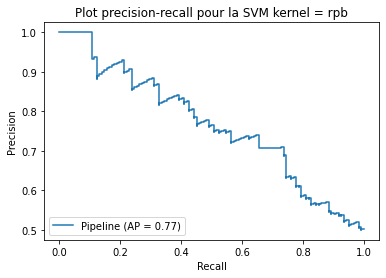

In [71]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svclassifier = SVC(kernel="rbf", gamma=0.01, C=30.0)
svclassifier.fit(X_train, y_train)


# With RBF Kernel
rbf_kernel_svm_clf = Pipeline([
        ("scaler", scaler ),
        ("svm_clf", svclassifier)
])
disp = plot_precision_recall_curve(rbf_kernel_svm_clf, X_test, y_test)
disp.ax_.set_title('Plot precision-recall pour la SVM kernel = rpb')